Return Rate (percentage of pieces returned out of the total number of pieces shipped):
             date product_id  Return_rate
0      2023-04-01       P011     4.057662
1      2023-04-01       P003     4.390244
2      2023-04-01       P005     7.020408
3      2023-04-01       P017     3.592046
4      2023-04-01       P019     5.512679
...           ...        ...          ...
82458  2024-01-25       P001     4.467806
82459  2024-01-25       P009     2.884013
82460  2024-01-25       P001     8.777778
82461  2024-01-25       P005     5.834885
82462  2024-01-25       P014     2.628121

[82463 rows x 3 columns]


<Figure size 2400x2400 with 0 Axes>

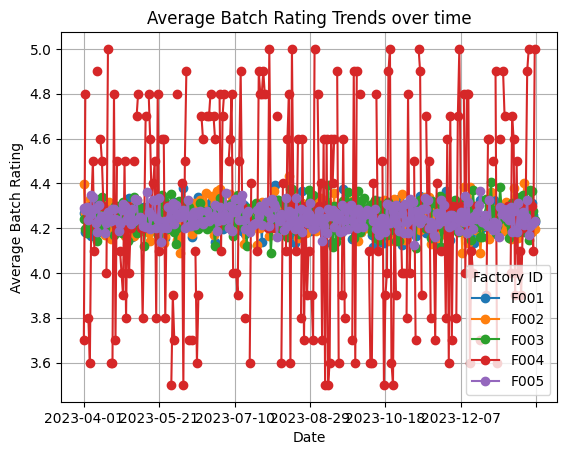

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#Load the csv file into a data frame
df = pd.read_csv(r'C:\Users\ngocd\source\Github\supply-chain-optimization\data\processed\merged_data.csv')

#Calculate the return rate
df ['Return_rate'] = (df['pieces_returned'] / df ['total_pieces'])*100 
#Access the columns in data frame with df
#Store the calculated value of Return_rate in a new column in the data frame

#Print the return rate
print ("Return Rate (percentage of pieces returned out of the total number of pieces shipped):") #Show outpute to the consoles
print (df[['date', 'product_id', 'Return_rate']]) #Print columns in the data frame to show calculate results

#Assess overall product quality using Average Batch Rating and identify trends over time
avg_batch_rating_trends = df.groupby(['date','factory_id'])['average_batch_rating'].mean().unstack() #unstackpivots factoryid column values into separate columns, to plot each factory's rating
#Group the data frame by the group column
#Calculate the mean of returned batch for each date because it helps in identifying trends in product quality over time
#Then store the resulting series in avg_batch_rating_trends
avg_batch_rating_trends_rolling = avg_batch_rating_trends.rolling(window=3).mean()

#Plot the trends over time
plt.figure(figsize=(24,12)) #Create a new figure with a specialized size (20 inches by 6 inches)
avg_batch_rating_trends.plot(kind='line',marker='o') #Plot the average batch rating trends with a marker at each data point
plt.title('Average Batch Rating Trends over time by Factory')
plt.xlabel('Date')
plt.ylabel('Average Batch Rating')
plt.grid(True) #Adds a grid to the plot for better readability
plt.legend(title='Factory ID')
plt.show()